In [1]:
!pip install pandas

In [2]:
!pip install folium`

zsh:1: unmatched `


In [3]:
!pip install cufflinks

In [4]:
!pip install plotly

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
%matplotlib inline
import plotly
import plotly.express as px
import plotly.graph_objects as go
plt.rcParams['figure.figsize']=17,8
import cufflinks as cf #Binds PANDAS AND MATPLOT
from plotly.offline import init_notebook_mode,plot,iplot
import folium
import plotly.offline as pyo

In [6]:
pyo.init_notebook_mode(connected=True)
cf.go_offline()

#So that we can use these modules OFFLINE

In [7]:
!pip install xlrd==1.2.0

In [8]:
pd.__version__

'1.1.5'

In [9]:
!pip install xlrd

In [10]:
data=pd.read_excel("/Users/joker/Desktop/Data Science/PROJECTS/COVID_19/COVID_19_Data/Covid_cases_in_India.xlsx")

In [11]:
data.head()

,S. No.,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death
0,1,Andhra Pradesh,12,0,1,0
1,2,Chhattisgarh,6,0,0,0
2,3,Delhi,38,1,6,1
3,4,Gujarat,43,0,0,3
4,5,Haryana,16,14,11,0


In [12]:
data.drop(['S. No.'],axis=1,inplace=True)

In [13]:
data.head()

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death
0,Andhra Pradesh,12,0,1,0
1,Chhattisgarh,6,0,0,0
2,Delhi,38,1,6,1
3,Gujarat,43,0,0,3
4,Haryana,16,14,11,0


In [14]:
data['Total Cases']=data['Total Confirmed cases (Indian National)']+data['Total Confirmed cases ( Foreign National )']

In [15]:
data.head()

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total Cases
0,Andhra Pradesh,12,0,1,0,12
1,Chhattisgarh,6,0,0,0,6
2,Delhi,38,1,6,1,39
3,Gujarat,43,0,0,3,43
4,Haryana,16,14,11,0,30


In [16]:
total_cases_overall=data['Total Cases'].sum()
print('The total number of cases till now in India is ',total_cases_overall)

The total number of cases till now in India is  729


In [17]:
data['Active Cases']=data['Total Cases']-(data['Death']+data['Cured'])

In [18]:
data.head()

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total Cases,Active Cases
0,Andhra Pradesh,12,0,1,0,12,11
1,Chhattisgarh,6,0,0,0,6,6
2,Delhi,38,1,6,1,39,32
3,Gujarat,43,0,0,3,43,40
4,Haryana,16,14,11,0,30,19


In [19]:
data.style.background_gradient(cmap='Reds')

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total Cases,Active Cases
0,Andhra Pradesh,12,0,1,0,12,11
1,Chhattisgarh,6,0,0,0,6,6
2,Delhi,38,1,6,1,39,32
3,Gujarat,43,0,0,3,43,40
4,Haryana,16,14,11,0,30,19
5,Himachal Pradesh,4,0,0,1,4,3
6,Karnataka,20,0,3,2,20,15
7,Kerala,131,7,11,0,138,127
8,Madhya Pradesh,23,0,0,1,23,22
9,Maharashtra,144,3,15,4,147,128


In [20]:
Total_Active_Cases=data.groupby('Name of State / UT')['Total Cases'].sum().sort_values(ascending=False).to_frame()

In [21]:
Total_Active_Cases

,Total Cases
Name of State / UT,
Maharashtra,147
Kerala,138
Telengana,45
Uttar Pradesh,43
Rajasthan,43
Gujarat,43
Delhi,39
Tamil Nadu,35
Haryana,30


In [22]:
Total_Active_Cases.style.background_gradient(cmap='Reds')

,Total Cases
Name of State / UT,
Maharashtra,147
Kerala,138
Telengana,45
Uttar Pradesh,43
Rajasthan,43
Gujarat,43
Delhi,39
Tamil Nadu,35
Haryana,30


#### GRAPHICAL Representation 

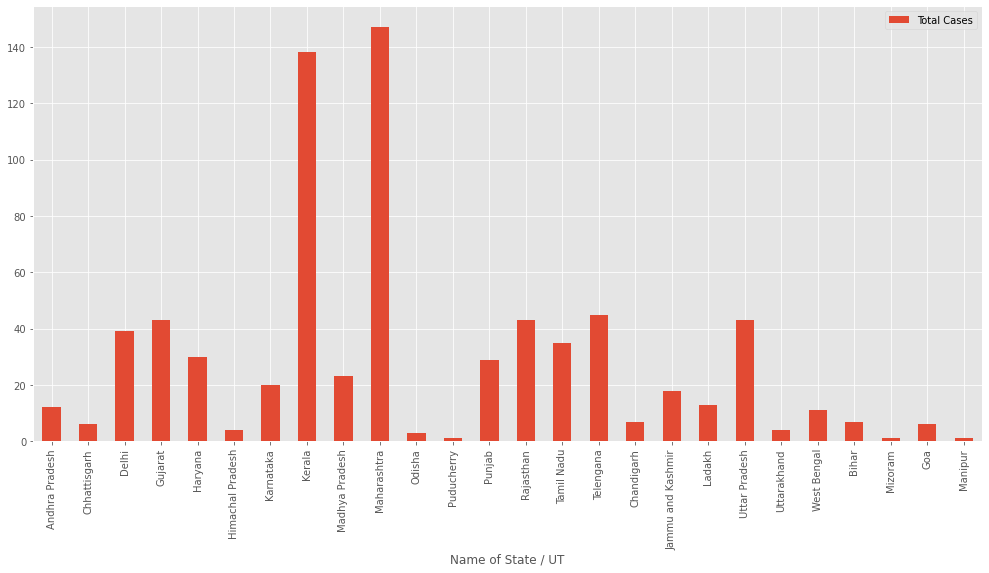

In [23]:
#Pandas vis
data.plot(kind='bar',x='Name of State / UT',y='Total Cases')
plt.show()


In [24]:
#Plotly
data.iplot(kind='bar',x='Name of State / UT',y='Total Cases')
#Better for DATA VISUALIZATION

In [25]:
px.bar(data_frame=data,x='Name of State / UT',y='Total Cases')
#Data Visualization with Plotly Express

<function matplotlib.pyplot.show(close=None, block=None)>

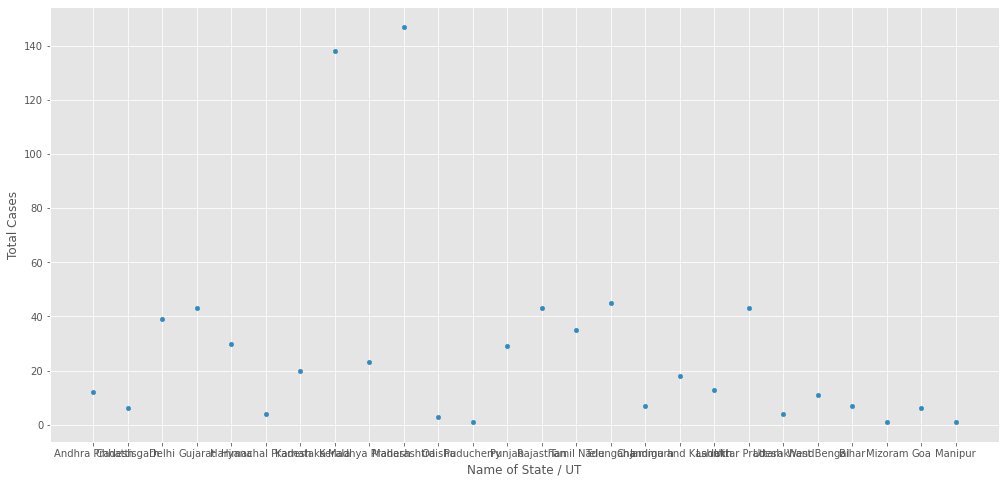

In [26]:
data.plot(kind='scatter',x='Name of State / UT',y='Total Cases')
plt.show
#Using pandas

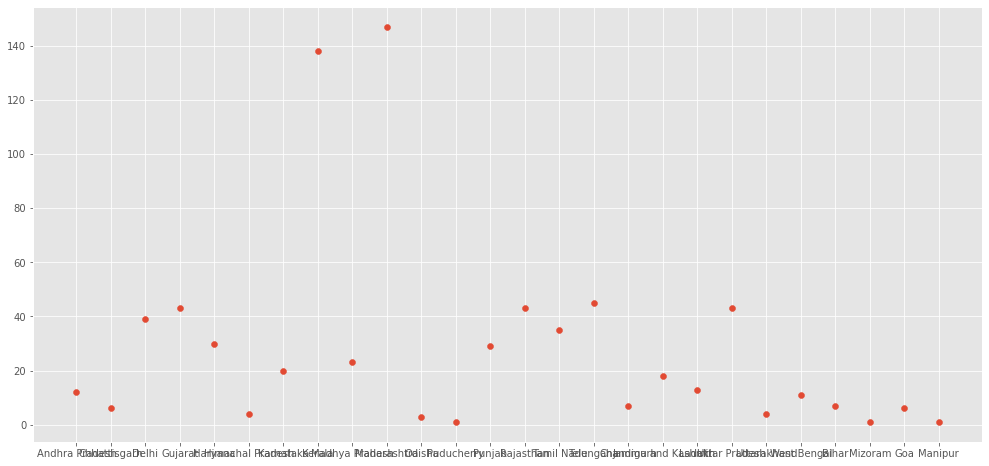

In [27]:
#matplot-
plt.scatter(data['Name of State / UT'],data['Total Cases'])

In [28]:
#Using Plotly
data.iplot(kind='scatter',x='Name of State / UT',y='Total Cases',xTitle='Name of State / UT',
    yTitle='Total Cases',mode='lines+markers+text',symbol='star',colors='black',title='Total cases vs Names of States/UT')

In [29]:
#Using Plotly Express
px.scatter(data,x='Name of State / UT',y='Total Cases',labels=True,title='Name of State vs Total Cases of Covid-19')

#### Object Oriented Meathod of matplot and matplotly

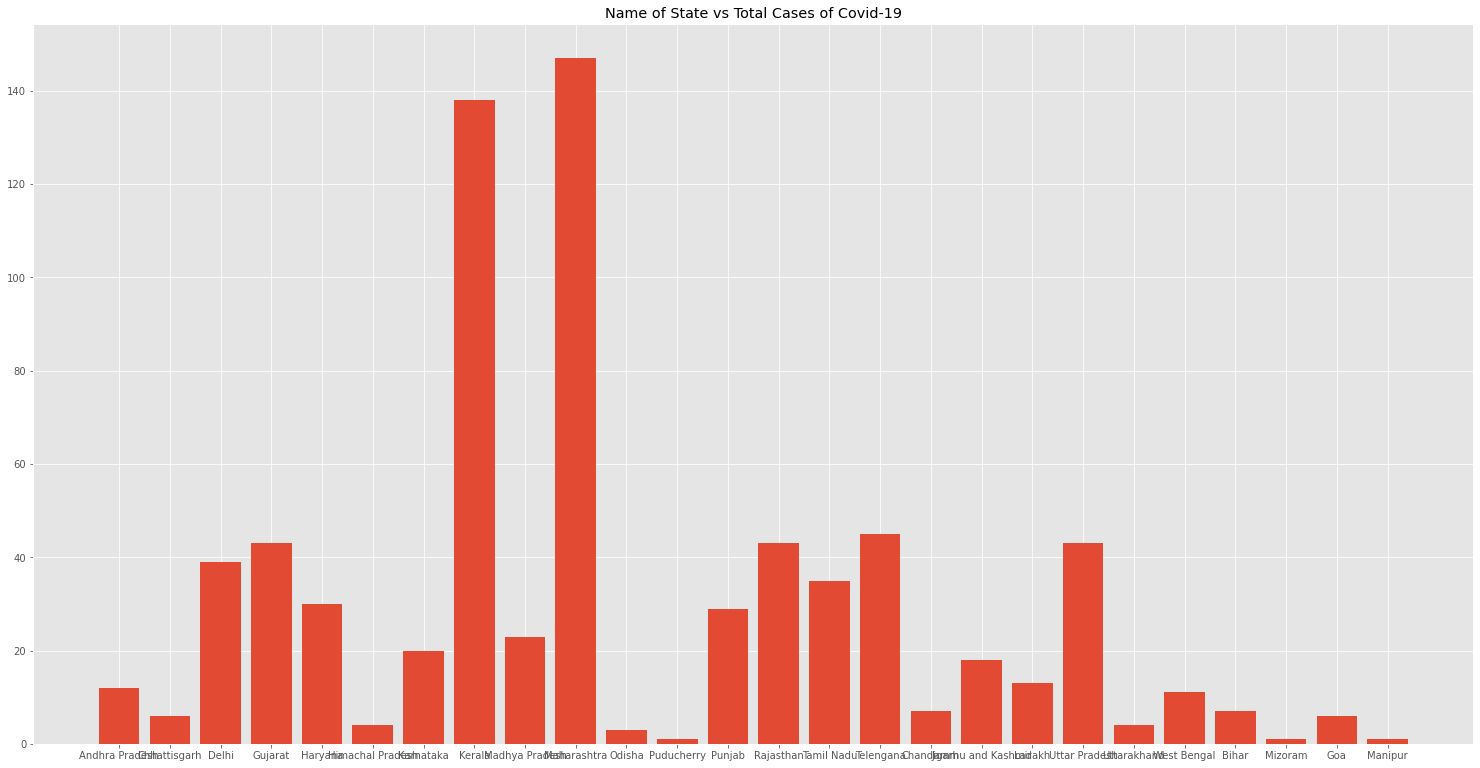

In [30]:
#Matplotlib-
fig=plt.figure(figsize=(20,10))
axes=fig.add_axes([0,0,1,1]) #left bottom width height
axes.bar(data['Name of State / UT'],data['Total Cases'])
axes.set_title('Name of State vs Total Cases of Covid-19')
plt.show()

In [31]:
#Using plotly
fig=go.Figure()
fig.add_trace(go.Bar(x=data['Name of State / UT'],y=data['Total Cases']))
fig.update_layout(title='Total Cases of Covid-19',xaxis=dict(title="Name of State"),yaxis=dict(title='Total Cases'))

#### Map

In [32]:
#loading Indian co-ordinates Data
india_coord=pd.read_excel('/Users/joker/Desktop/Data Science/PROJECTS/COVID_19/COVID_19_Data/Indian Coordinates.xlsx')

In [33]:
df_full=pd.merge(india_coord,data,on='Name of State / UT')
#Merging CSV

In [34]:
df_full.head()

,Name of State / UT,Latitude,Longitude,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total Cases,Active Cases
0,Andhra Pradesh,14.750429,78.570026,12,0,1,0,12,11
1,Delhi,28.669993,77.230004,38,1,6,1,39,32
2,Haryana,28.450006,77.019991,16,14,11,0,30,19
3,Karnataka,12.570381,76.919997,20,0,3,2,20,15
4,Kerala,8.900373,76.569993,131,7,11,0,138,127


In [35]:
india_coord.head()

,Name of State / UT,Latitude,Longitude
0,Andaman And Nicobar,11.667026,92.735983
1,Andhra Pradesh,14.750429,78.570026
2,Arunachal Pradesh,27.100399,93.616601
3,Assam,26.749981,94.216667
4,Bihar,25.785414,87.479973


In [36]:
#Using Follium library to make map and plot circles of area affected:
map=folium.Map(location=[20,70],zoom_start=4,tiles='Stamenterrain')

for lat,long,value, name in zip(df_full['Latitude'],df_full['Longitude'],df_full['Total Cases'],df_full['Name of State / UT']):
    folium.CircleMarker([lat,long],radius=value*0.8,popup=('<strong>State</strong>: '+str(name).capitalize()+'<br>''<strong>Total Cases</strong>: ' + str(value)+ '<br>'),color='red',fill_color="Blue",fill_opacity=0.3).add_to(map)
    

In [37]:
map

#### Covid cases rising Globally

In [38]:
dbd_India=pd.read_excel('/Users/joker/Desktop/Data Science/PROJECTS/COVID_19/COVID_19_Data/per_day_cases.xlsx',parse_dates=True,sheet_name="India")
dbd_Italy=pd.read_excel('/Users/joker/Desktop/Data Science/PROJECTS/COVID_19/COVID_19_Data/per_day_cases.xlsx',parse_dates=True,sheet_name="Italy")
dbd_Korea=pd.read_excel('/Users/joker/Desktop/Data Science/PROJECTS/COVID_19/COVID_19_Data/per_day_cases.xlsx',parse_dates=True,sheet_name="Korea")
dbd_Wuhan=pd.read_excel('/Users/joker/Desktop/Data Science/PROJECTS/COVID_19/COVID_19_Data/per_day_cases.xlsx',parse_dates=True,sheet_name="Wuhan")

In [39]:
dbd_India.head()

,Date,Total Cases,New Cases,Days after surpassing 100 cases
0,2020-01-30,1,1,NaN
1,2020-01-31,1,0,NaN
2,2020-02-01,1,0,NaN
3,2020-02-02,2,1,NaN
4,2020-02-03,3,1,NaN


In [40]:
#plotly Express

fig=px.bar(dbd_India,x="Date",y="Total Cases",color='Total Cases',title='Confirmed cases in India')
fig.show()

In [41]:
fig=px.bar(dbd_Italy,x="Date",y="Total Cases",color='Total Cases',title='Confirmed cases in Italy')
fig.show()

fig=px.bar(dbd_Korea,x="Date",y="Total Cases",color='Total Cases',title='Confirmed cases in Korea')
fig.show()

fig=px.bar(dbd_Wuhan,x="Date",y="Total Cases",color='Total Cases',title='Confirmed cases in Wuhan')
fig.show()

In [42]:
#plotly Express

fig=px.scatter(dbd_India,x="Date",y="Total Cases",color='Total Cases',title='Confirmed cases in India')
fig.show()

In [43]:
#Plotly
dbd_India.iplot(kind='scatter',x='Date',y='Total Cases',mode='lines+markers')

In [44]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=dbd_India['Date'],y=dbd_India['Total Cases'],mode='lines+markers'))

In [45]:
from plotly.subplots import make_subplots

In [46]:
fig=make_subplots(
    rows=2,cols=2,
    specs=[[{"secondary_y":True},{"secondary_y":True}],[{"secondary_y":True},{"secondary_y":True}]],
    subplot_titles=("S.Korea","Italy","India","Wuhan"))

fig.add_trace(go.Bar(x=dbd_Korea['Date'],y=dbd_Korea['Total Cases'],
                    marker=dict(color=dbd_Korea['Total Cases'],coloraxis="coloraxis")),1,1)

fig.add_trace(go.Bar(x=dbd_Italy['Date'],y=dbd_Italy['Total Cases'],
                    marker=dict(color=dbd_Italy['Total Cases'],coloraxis="coloraxis")),1,2)

fig.add_trace(go.Bar(x=dbd_India['Date'],y=dbd_India['Total Cases'],
                    marker=dict(color=dbd_India['Total Cases'],coloraxis="coloraxis")),2,1)

fig.add_trace(go.Bar(x=dbd_Wuhan['Date'],y=dbd_Wuhan['Total Cases'],
                    marker=dict(color=dbd_Wuhan['Total Cases'],coloraxis="coloraxis")),2,2)



fig.update_layout(coloraxis=dict(colorscale='Bluered_r'),showlegend=False,title_text="Total Cases in 4 Countries")

fig.update_layout(plot_bgcolor='rgb(230,230,230)')

In [47]:
#Scatter Plot
fig=make_subplots(
    rows=2,cols=2,
    specs=[[{"secondary_y":True},{"secondary_y":True}],[{"secondary_y":True},{"secondary_y":True}]],
    subplot_titles=("S.Korea","Italy","India","Wuhan"))

fig.add_trace(go.Scatter(x=dbd_Korea['Date'],y=dbd_Korea['Total Cases'],
                    marker=dict(color=dbd_Korea['Total Cases'],coloraxis="coloraxis")),1,1)

fig.add_trace(go.Scatter(x=dbd_Italy['Date'],y=dbd_Italy['Total Cases'],
                    marker=dict(color=dbd_Italy['Total Cases'],coloraxis="coloraxis")),1,2)

fig.add_trace(go.Scatter(x=dbd_India['Date'],y=dbd_India['Total Cases'],
                    marker=dict(color=dbd_India['Total Cases'],coloraxis="coloraxis")),2,1)

fig.add_trace(go.Scatter(x=dbd_Wuhan['Date'],y=dbd_Wuhan['Total Cases'],
                    marker=dict(color=dbd_Wuhan['Total Cases'],coloraxis="coloraxis")),2,2)



fig.update_layout(coloraxis=dict(colorscale='Bluered_r'),showlegend=False,title_text="Total Cases in 4 Countries")

fig.update_layout(plot_bgcolor='rgb(230,230,230)')

#### #World Coronavirus

In [48]:
df=pd.read_csv('/Users/joker/Desktop/Data Science/PROJECTS/COVID_19/COVID_19_Data/covid_19_data.csv',parse_dates=['Last Update'])

In [49]:
df.rename(columns={'ObservationDate':'Date','Country/Region':'Country'},inplace=True)

In [50]:
df

,SNo,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
5885,5886,03/15/2020,Gibraltar,UK,2020-03-14 16:33:03,1.0,0.0,1.0
5886,5887,03/15/2020,NaN,Uzbekistan,2020-03-15 18:20:19,1.0,0.0,0.0
5887,5888,03/15/2020,Diamond Princess cruise ship,Australia,2020-03-14 02:33:04,0.0,0.0,0.0
5888,5889,03/15/2020,West Virginia,US,2020-03-10 02:33:04,0.0,0.0,0.0


In [51]:
df.query('Country=="UK"')

,SNo,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
481,482,01/31/2020,NaN,UK,2020-01-31 23:59:00,2.0,0.0,0.0
541,542,02/01/2020,NaN,UK,2020-02-01 01:52:00,2.0,0.0,0.0
611,612,02/02/2020,NaN,UK,2020-02-01 01:52:40,2.0,0.0,0.0
678,679,02/03/2020,NaN,UK,2020-02-01 01:52:40,2.0,0.0,0.0
746,747,02/04/2020,NaN,UK,2020-02-01 01:52:40,2.0,0.0,0.0
817,818,02/05/2020,NaN,UK,2020-02-01 01:52:40,2.0,0.0,0.0
888,889,02/06/2020,NaN,UK,2020-02-01 01:52:40,2.0,0.0,0.0
957,958,02/07/2020,NaN,UK,2020-02-07 18:33:02,3.0,0.0,0.0
1029,1030,02/08/2020,NaN,UK,2020-02-07 18:33:02,3.0,0.0,0.0
1101,1102,02/09/2020,NaN,UK,2020-02-07 18:33:02,3.0,0.0,0.0


In [52]:
df.query('Country=="India"')

,SNo,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
430,431,01/30/2020,NaN,India,2020-01-30 16:00:00,1.0,0.0,0.0
491,492,01/31/2020,NaN,India,2020-01-31 23:59:00,1.0,0.0,0.0
547,548,02/01/2020,NaN,India,2020-01-31 08:15:00,1.0,0.0,0.0
607,608,02/02/2020,NaN,India,2020-02-02 06:03:08,2.0,0.0,0.0
672,673,02/03/2020,NaN,India,2020-02-03 21:43:02,3.0,0.0,0.0
740,741,02/04/2020,NaN,India,2020-02-03 21:43:02,3.0,0.0,0.0
810,811,02/05/2020,NaN,India,2020-02-03 21:43:02,3.0,0.0,0.0
881,882,02/06/2020,NaN,India,2020-02-03 21:43:02,3.0,0.0,0.0
954,955,02/07/2020,NaN,India,2020-02-03 21:43:02,3.0,0.0,0.0
1026,1027,02/08/2020,NaN,India,2020-02-03 21:43:02,3.0,0.0,0.0


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5890 entries, 0 to 5889
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   SNo             5890 non-null   int64         
 1   Date            5890 non-null   object        
 2   Province/State  3575 non-null   object        
 3   Country         5890 non-null   object        
 4   Last Update     5890 non-null   datetime64[ns]
 5   Confirmed       5890 non-null   float64       
 6   Deaths          5890 non-null   float64       
 7   Recovered       5890 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(3)
memory usage: 368.2+ KB


In [54]:
df.groupby('Date').sum()
#Cases in India each day

,SNo,Confirmed,Deaths,Recovered
Date,,,,
01/22/2020,741,555.0,17.0,28.0
01/23/2020,2829,653.0,18.0,30.0
01/24/2020,4305,941.0,26.0,36.0
01/25/2020,6490,1438.0,42.0,39.0
01/26/2020,9071,2118.0,56.0,52.0
01/27/2020,12342,2927.0,82.0,61.0
01/28/2020,15262,5578.0,131.0,107.0
01/29/2020,18711,6165.0,133.0,126.0
01/30/2020,23345,8235.0,171.0,143.0


In [55]:
confirmed=df.groupby('Date').sum()['Confirmed'].reset_index()
death=df.groupby('Date').sum()['Deaths'].reset_index()
rec=df.groupby('Date').sum()['Recovered'].reset_index()

In [56]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=confirmed['Date'],y=confirmed['Confirmed'],mode='lines+markers',name='Confirmed',line=dict(color='blue',width=2)))

fig.add_trace(go.Scatter(x=death['Date'],y=death['Deaths'],mode='lines+markers',name='Deaths',line=dict(color='red',width=2)))
fig.add_trace(go.Scatter(x=rec['Date'],y=rec['Recovered'],mode='lines+markers',name='Recovered',line=dict(color='green',width=2)))



In [57]:
df_confirmed=pd.read_csv("/Users/joker/Desktop/Data Science/PROJECTS/COVID_19/COVID_19_Data/time_series_covid_19_confirmed.csv")

In [58]:
df_confirmed.rename(columns={'Country/Region':'Country'},inplace=True)

In [59]:
df_latlong=pd.merge(df,df_confirmed,on=['Country','Province/State'])

In [60]:
df_latlong

,SNo,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered,Lat,Long,...,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20
0,32,01/22/2020,Washington,US,2020-01-22 17:00:00,1.0,0.0,0.0,47.4009,-121.4905,...,0,0,0,0,0,267,366,442,568,572
1,70,01/23/2020,Washington,US,2020-01-23 17:00:00,1.0,0.0,0.0,47.4009,-121.4905,...,0,0,0,0,0,267,366,442,568,572
2,118,01/24/2020,Washington,US,2020-01-24 17:00:00,1.0,0.0,0.0,47.4009,-121.4905,...,0,0,0,0,0,267,366,442,568,572
3,159,01/25/2020,Washington,US,2020-01-25 17:00:00,1.0,0.0,0.0,47.4009,-121.4905,...,0,0,0,0,0,267,366,442,568,572
4,203,01/26/2020,Washington,US,2020-01-26 16:00:00,1.0,0.0,0.0,47.4009,-121.4905,...,0,0,0,0,0,267,366,442,568,572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3285,5879,03/15/2020,NaN,Saint Vincent and the Grenadines,2020-03-14 16:33:03,1.0,0.0,0.0,12.9843,-61.2872,...,0,0,0,0,0,0,0,0,0,1
3286,5625,03/14/2020,NaN,Suriname,2020-03-14 16:33:03,1.0,0.0,0.0,3.9193,-56.0278,...,0,0,0,0,0,0,0,0,0,1
3287,5881,03/15/2020,NaN,Suriname,2020-03-14 16:33:03,1.0,0.0,0.0,3.9193,-56.0278,...,0,0,0,0,0,0,0,0,0,1
3288,5628,03/14/2020,"Virgin Islands, U.S.",US,2020-03-14 16:15:18,1.0,0.0,0.0,18.3358,-64.8963,...,0,0,0,0,0,0,0,0,0,1


In [61]:
fig=px.density_mapbox(df_latlong,lat="Lat",lon="Long",hover_name="Province/State",hover_data=["Confirmed","Deaths","Recovered"],animation_frame="Date",color_continuous_scale="Portland",radius=7,zoom=0,height=700)
fig.update_layout(title='Worldwide Corona Virus Cases')
fig.update_layout(mapbox_style="open-street-map",mapbox_center_lon=0)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

In [62]:
!pip install voila